# Import packages

In [220]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

-------------------------------------------------------

# Prepare dataset

In [36]:
file_tagged_dataset = r'C:\Users\sujeeth.kumaravel\Desktop\nov\Novartis_Xiidra_Manual_Categorisation_Sample Data_Mar17_V1.02.xlsx'

In [37]:
df_tagged = pd.read_excel(file_tagged_dataset, sheet_name='Manually tagged')

In [38]:
df_tagged = df_tagged[['Hit Sentence', 'Cost', 'Efficacy', 'Safety', 'Compliance/ adherence', 'Comfort/ convenience']]

In [39]:
df_tagged_out = df_tagged[['Cost', 'Efficacy', 'Safety', 'Compliance/ adherence', 'Comfort/ convenience']]

In [40]:
df_tagged_out.isnull().sum()

Cost                      818
Efficacy                  897
Safety                    981
Compliance/ adherence     947
Comfort/ convenience     1003
dtype: int64

In [41]:
df_tagged_out.fillna(0, inplace=True)

In [42]:
df_tagged_out.isnull().sum()

Cost                     0
Efficacy                 0
Safety                   0
Compliance/ adherence    0
Comfort/ convenience     0
dtype: int64

In [43]:
df_tagged_out['Cost'].dtype

dtype('O')

In [221]:
df_tagged_out['Cost'] = pd.to_numeric(df_tagged_out['Cost'], errors='coerce')

In [55]:
df_km = pd.DataFrame(df_tagged_out.idxmax(axis=1))

In [56]:
df_km.columns=['keymessage']

In [57]:
df_km.columns

Index(['keymessage'], dtype='object')

In [58]:
df_km.head()

,keymessage
0,Efficacy
1,Efficacy
2,Efficacy
3,Efficacy
4,Efficacy


In [59]:
df_text_km = pd.concat([df_tagged, df_km], axis=1)

In [60]:
df_text_km.columns

Index(['Hit Sentence', 'Cost', 'Efficacy', 'Safety', 'Compliance/ adherence',
       'Comfort/ convenience', 'keymessage'],
      dtype='object')

In [61]:
df_text_km.drop(['Cost', 'Efficacy', 'Safety', 'Compliance/ adherence', 'Comfort/ convenience'], axis=1, inplace=True)

In [62]:
df_text_km.columns

Index(['Hit Sentence', 'keymessage'], dtype='object')

In [71]:
df_text_km.keymessage.value_counts()

Cost                     776
Efficacy                 121
Compliance/ adherence     71
Safety                    47
Comfort/ convenience      30
Name: keymessage, dtype: int64

In [66]:
df_text_km['keymessage_encode'] = df_text_km['keymessage'].astype('category').cat.codes

In [82]:
df_Cost = df_text_km.loc[df_text_km['keymessage'] == 'Cost']
df_Safety = df_text_km.loc[df_text_km['keymessage'] == 'Safety']
df_Efficacy = df_text_km.loc[df_text_km['keymessage'] == 'Efficacy']
df_ComplianceAdherence = df_text_km.loc[df_text_km['keymessage'] == 'Compliance/ adherence']
df_ComfortConvenience = df_text_km.loc[df_text_km['keymessage'] == 'Comfort/ convenience']

In [68]:
type(df_Cost)

pandas.core.frame.DataFrame

In [70]:
df_Cost.shape

(776, 3)

In [84]:
lst_Cost = list(df_Cost['Hit Sentence'])
lst_Safety = list(df_Safety['Hit Sentence'])
lst_Efficacy = list(df_Efficacy['Hit Sentence'])
lst_ComplianceAdherence = list(df_ComplianceAdherence['Hit Sentence'])
lst_ComfortConvenience = list(df_ComfortConvenience['Hit Sentence'])

---------------------------------------------------------------------------------------------------------------

# Word Cloud - Raw Text

In [74]:
from wordcloud import WordCloud

In [75]:
def wordcloud_cluster(lst_sent):
    
    cloud = " ".join(lst_sent)
    wordcloud = WordCloud(width = 1600, height = 1200,
                         background_color = 'black',
                         stopwords = set(nltk.corpus.stopwords.words('english')),
                         min_font_size=10).generate(cloud)
    
    # plot the word cloud image
    plt.figure(figsize=(8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

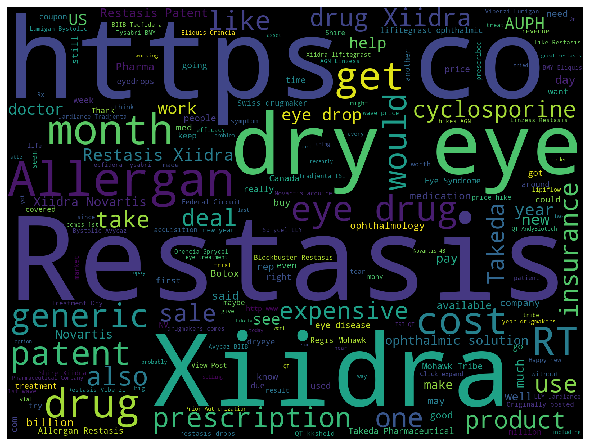

In [80]:
wordcloud_cluster(lst_Cost)

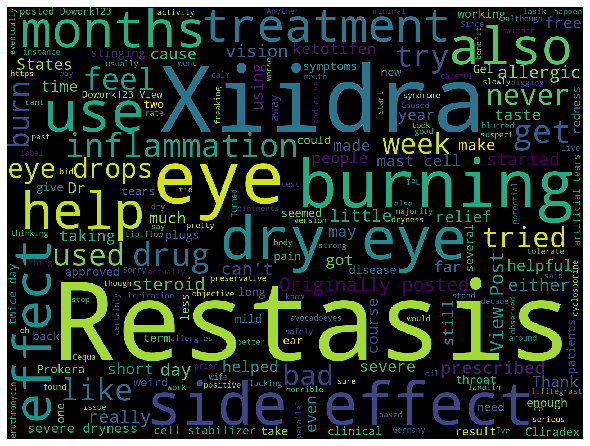

In [85]:
wordcloud_cluster(lst_Safety)

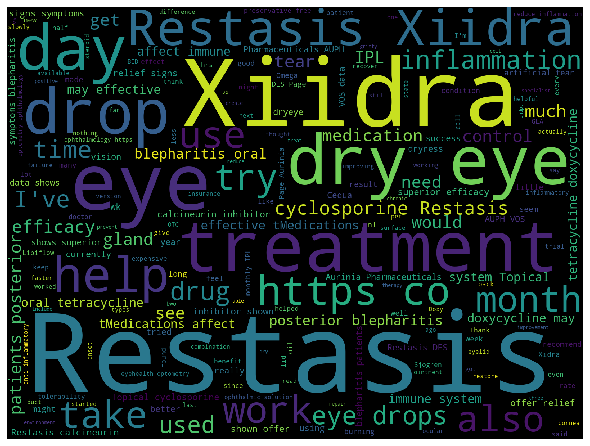

In [86]:
wordcloud_cluster(lst_Efficacy)

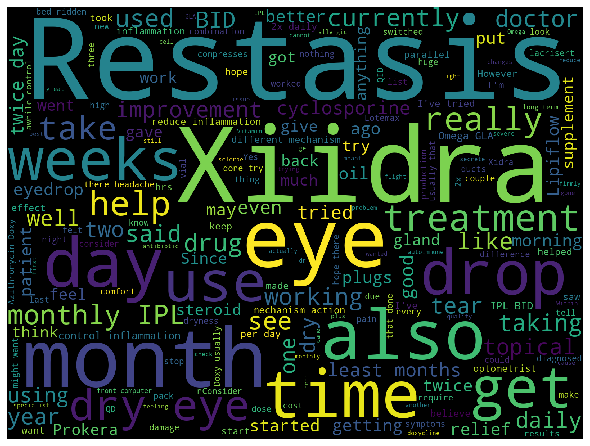

In [87]:
wordcloud_cluster(lst_ComplianceAdherence)

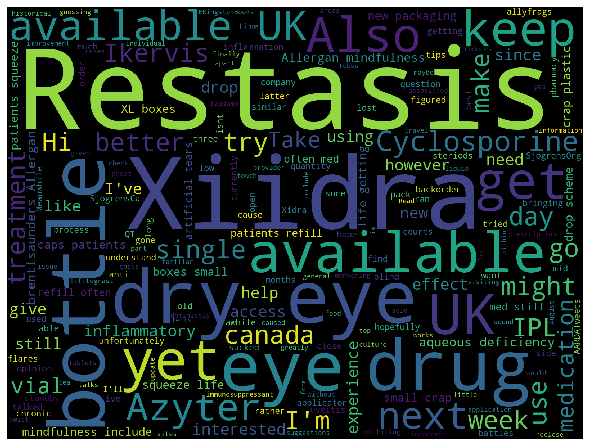

In [88]:
wordcloud_cluster(lst_ComfortConvenience)

-----------------------------------------------------------------------------------------

# Cleaning - remove stop words, remove commonly occuring words

In [194]:
words_occuring_across_categories = ['xiidra', 'restasis', 'dry', 'eye', 'eyes', 'rt', 'https', 'uk', 'canada', 'generic', 'drug', 'novartis', 'allergan', 'co']

In [195]:
def text_processing(df, col):
    
    temp_df = df[col]
    
    # 1.Remove punctuation
    temp_df = temp_df.apply(lambda x: re.sub('[[^a-zA-Z]]',' ',x))
    # 2. converting lower case
    temp_df = temp_df.apply(lambda x: x.lower())
    # 3. removing special character and digit
    temp_df = temp_df.apply(lambda x: re.sub("(\\d|\\W)+"," ",x))
    # 4. removing the single letter word
    temp_df = temp_df.apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "",x))
    
    return temp_df

In [196]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [197]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [198]:
df_temp = pd.DataFrame(filtered)
df_temp.columns = ['sentence']

In [199]:
df_processed = pd.DataFrame(text_processing(df_temp, 'sentence'))

In [200]:
df_processed.columns = ['processed_sentences']

In [201]:
filtered = list()
for index, row in df_processed.iterrows():
    tokens = nltk.word_tokenize(row['processed_sentences'])
    filtered_1 = list()
    filtered_2 = list()
    filtered_1 = [w for w in tokens if not w in stop_words]
    filtered_2 = [w for w in filtered_1 if not w in words_occuring_across_categories]
    sent = " ".join(filtered_2)
    filtered.append(sent)

In [202]:
filtered

['dormant previously thought dead glands somehow able recover secret oil treatments may help include ipl theory treatments reduce inflammation create environment glands tissue recover',
 'dormant previously thought dead glands somehow able recover secret oil treatments may help include ipl theory treatments reduce inflammation create environment glands tissue recover',
 'patients posterior blepharitis oral tetracycline doxycycline may effective tmedications affect immune system topical cyclosporine calcineurin inhibitor shown offer relief signs symptoms blepharitis',
 'patients posterior blepharitis oral tetracycline doxycycline may effective tmedications affect immune system topical cyclosporine calcineurin inhibitor shown offer relief signs symptoms blepharitis',
 'patients posterior blepharitis oral tetracycline doxycycline may effective tmedications affect immune system topical cyclosporine calcineurin inhibitor shown offer relief signs symptoms blepharitis',
 'patients posterior b

In [203]:
len(filtered)

1045

In [204]:
df_cleaned_text = pd.DataFrame(filtered)

In [205]:
df_cleaned_text.columns = ['cleaned_text']

In [209]:
df_text_km = pd.concat([df_text_km, df_cleaned_text], axis=1)

In [210]:
df_text_km.columns

Index(['Hit Sentence', 'keymessage', 'keymessage_encode', 'cleaned_text'], dtype='object')

In [211]:
df_Cost_cleaned = df_text_km.loc[df_text_km['keymessage'] == 'Cost']
df_Safety_cleaned = df_text_km.loc[df_text_km['keymessage'] == 'Safety']
df_Efficacy_cleaned = df_text_km.loc[df_text_km['keymessage'] == 'Efficacy']
df_ComplianceAdherence_cleaned = df_text_km.loc[df_text_km['keymessage'] == 'Compliance/ adherence']
df_ComfortConvenience_cleaned = df_text_km.loc[df_text_km['keymessage'] == 'Comfort/ convenience']

In [212]:
lst_Cost_cleaned = list(df_Cost_cleaned['cleaned_text'])
lst_Safety_cleaned = list(df_Safety_cleaned['cleaned_text'])
lst_Efficacy_cleaned = list(df_Efficacy_cleaned['cleaned_text'])
lst_ComplianceAdherence_cleaned = list(df_ComplianceAdherence_cleaned['cleaned_text'])
lst_ComfortConvenience_cleaned = list(df_ComfortConvenience_cleaned['cleaned_text'])

# Word Cloud - Cleaned Text

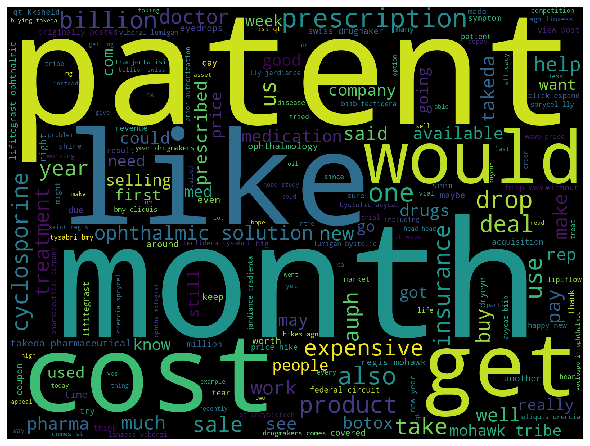

In [213]:
wordcloud_cluster(lst_Cost_cleaned)

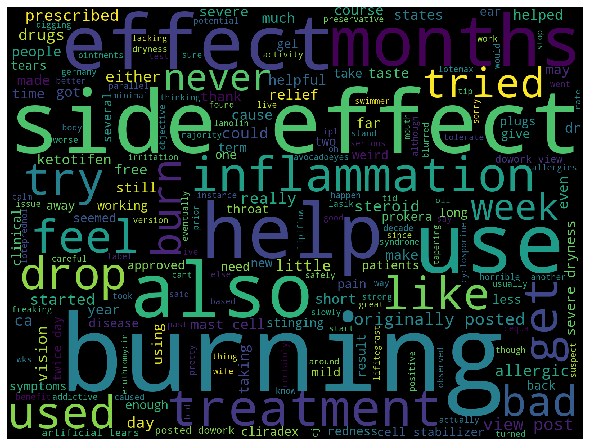

In [214]:
wordcloud_cluster(lst_Safety_cleaned)

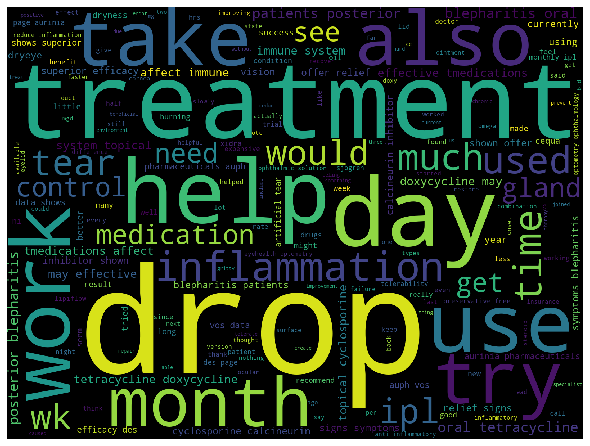

In [215]:
wordcloud_cluster(lst_Efficacy_cleaned)

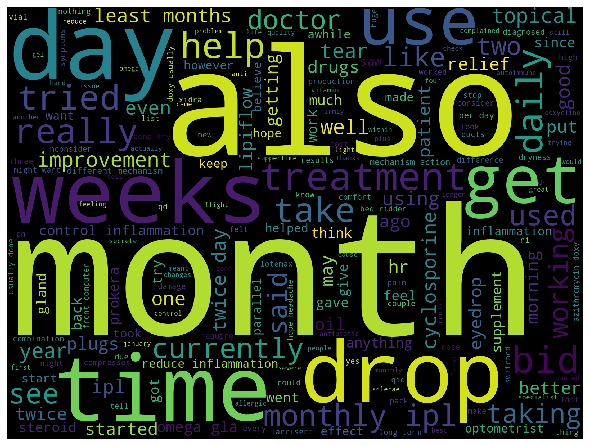

In [216]:
wordcloud_cluster(lst_ComplianceAdherence_cleaned)

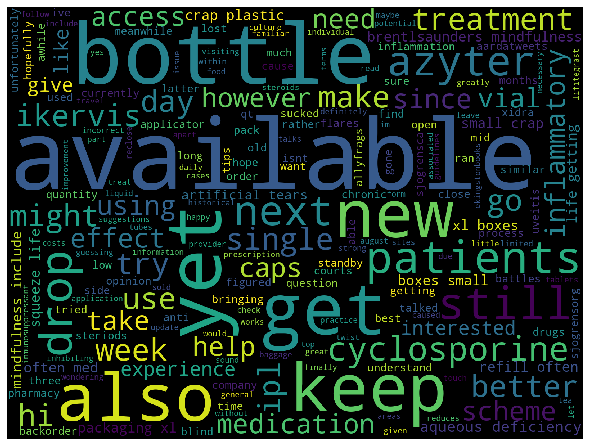

In [217]:
wordcloud_cluster(lst_ComfortConvenience_cleaned)

In [223]:
lst_Cost_cleaned

['clearly need little homework click expand point einstein get hence increase sales force everyone forvever change right away leave',
 'lmfao click expand recall speaking spin maybe people stayed happy go fun wherever went hope works likely couldnt make selling youll looking job next year anyway',
 'biotech altium aurinia posts mixed midphase data would rival jb ioawi',
 'dryeye takesa offload part acquisition shire sales million net',
 'dryeyedisease ocularsurfacedisease dryeye optometry migraines headaches truetear tempsureenvi lipiflow intensepulselight tei ureyes theeyeinstitute thetearinstitute',
 'dryeyedisease ocularsurfacedisease dryeye optometry migraines headaches truetear tempsureenvi lipiflow intensepulselight tei ureyes theeyeinstitute thetearinstitute',
 'dryeyesyndrome lupus lupusimprovements lupusawareness lupusflare lupuswarrior lupusproblems miami florida research clinicaltrials advanced pharma miami yrl eppx',
 'meibomianglanddysfunction chronic progressive disease c

In [229]:
lst_Cost_token = list()
for sent in lst_Cost_cleaned:
    lst_tokens = list()
    lst_tokens = nltk.word_tokenize(sent)
    lst_Cost_token += lst_tokens
    
lst_Safety_token = list()
for sent in lst_Safety_cleaned:
    lst_tokens = list()
    lst_tokens = nltk.word_tokenize(sent)
    lst_Safety_token += lst_tokens
    
lst_Efficacy_token = list()
for sent in lst_Efficacy_cleaned:
    lst_tokens = list()
    lst_tokens = nltk.word_tokenize(sent)
    lst_Efficacy_token += lst_tokens
    
lst_ComplianceAdherence_token = list()
for sent in lst_ComplianceAdherence_cleaned:
    lst_tokens = list()
    lst_tokens = nltk.word_tokenize(sent)
    lst_ComplianceAdherence_token += lst_tokens
    
lst_ComfortConvenience_token = list()
for sent in lst_ComfortConvenience_cleaned:
    lst_tokens = list()
    lst_tokens = nltk.word_tokenize(sent)
    lst_ComfortConvenience_token += lst_tokens

In [231]:
lst_Cost_token

['clearly',
 'need',
 'little',
 'homework',
 'click',
 'expand',
 'point',
 'einstein',
 'get',
 'hence',
 'increase',
 'sales',
 'force',
 'everyone',
 'forvever',
 'change',
 'right',
 'away',
 'leave',
 'lmfao',
 'click',
 'expand',
 'recall',
 'speaking',
 'spin',
 'maybe',
 'people',
 'stayed',
 'happy',
 'go',
 'fun',
 'wherever',
 'went',
 'hope',
 'works',
 'likely',
 'couldnt',
 'make',
 'selling',
 'youll',
 'looking',
 'job',
 'next',
 'year',
 'anyway',
 'biotech',
 'altium',
 'aurinia',
 'posts',
 'mixed',
 'midphase',
 'data',
 'would',
 'rival',
 'jb',
 'ioawi',
 'dryeye',
 'takesa',
 'offload',
 'part',
 'acquisition',
 'shire',
 'sales',
 'million',
 'net',
 'dryeyedisease',
 'ocularsurfacedisease',
 'dryeye',
 'optometry',
 'migraines',
 'headaches',
 'truetear',
 'tempsureenvi',
 'lipiflow',
 'intensepulselight',
 'tei',
 'ureyes',
 'theeyeinstitute',
 'thetearinstitute',
 'dryeyedisease',
 'ocularsurfacedisease',
 'dryeye',
 'optometry',
 'migraines',
 'headaches',

In [236]:
df_Cost_tokens = pd.DataFrame(lst_Cost_token)
df_Safety_tokens = pd.DataFrame(lst_Safety_token)
df_Efficacy_tokens = pd.DataFrame(lst_Efficacy_token)
df_ComplianceAdherence_tokens = pd.DataFrame(lst_ComplianceAdherence_token)
df_ComfortConvenience_tokens = pd.DataFrame(lst_ComfortConvenience_token)

In [237]:
df_Cost_tokens.columns=['tokens']
df_Safety_tokens.columns=['tokens']
df_Efficacy_tokens.columns=['tokens']
df_ComplianceAdherence_tokens.columns=['tokens']
df_ComfortConvenience_tokens.columns=['tokens']

In [251]:
values_count_cost = pd.DataFrame(df_Cost_tokens['tokens'].value_counts())
values_count_safety = pd.DataFrame(df_Safety_tokens['tokens'].value_counts())
values_count_efficacy = pd.DataFrame(df_Efficacy_tokens['tokens'].value_counts())
values_count_complianceadherence = pd.DataFrame(df_ComplianceAdherence_tokens['tokens'].value_counts())
values_count_comfortconvenience = pd.DataFrame(df_ComfortConvenience_tokens['tokens'].value_counts())

In [252]:
values_count_cost.columns = ['values_count']
values_count_safety.columns = ['values_count']
values_count_efficacy.columns = ['values_count']
values_count_complianceadherence.columns = ['values_count']
values_count_comfortconvenience.columns = ['values_count']

In [253]:
for i, r in values_count_cost.iterrows():
    print(i, r['values_count'])

takeda 118
billion 91
insurance 81
cost 74
like 71
get 69
qt 67
patent 65
drops 65
sales 64
would 64
month 64
price 63
also 63
year 61
ophthalmic 58
company 56
shire 54
deal 54
treatment 54
one 53
patents 51
prescription 50
auph 50
new 49
blockbuster 47
expensive 45
use 44
tribe 43
agn 42
cyclosporine 42
lifitegrast 42
said 41
pharma 41
us 40
take 40
solution 39
months 38
see 38
well 38
market 37
supply 35
portfolio 35
pharmaceutical 34
drugs 34
help 33
day 32
around 32
selling 31
much 31
got 31
years 31
good 31
people 31
pharmacy 31
first 30
available 30
may 30
product 30
disease 29
sell 29
money 29
results 29
com 29
post 29
could 28
potential 28
nvs 28
ophthalmology 28
try 28
efficacy 27
prescribed 27
make 27
time 26
since 26
pay 26
medicare 26
st 26
head 26
tried 26
really 26
http 25
botox 25
used 25
explain 24
acquire 24
pa 24
mohawk 24
buy 24
still 24
federal 23
know 23
news 23
expand 23
syndrome 23
drugmaker 23
afford 23
kksheld 23
medicines 23
care 23
patient 23
doctor 22
rule 2

denial 3
wanted 3
bedroom 3
bonus 3
email 3
comparing 3
measures 3
reminder 3
honestly 3
friend 3
generate 3
saying 3
edt 3
balance 3
ridiculous 3
nsource 3
feedback 3
bill 3
cyclsoporin 3
whole 3
dropped 3
eventually 3
ontario 3
condition 3
edihutfmp 3
find 3
fiercepharma 3
exclusivity 3
doc 3
fill 3
check 3
popular 3
minimal 3
assert 3
met 3
eylea 3
chartzandnews 3
worse 3
sypmtom 3
oversight 3
rheumatoid 3
burden 3
diagnosed 3
history 3
aware 3
remedy 3
surprise 3
expirations 3
entirely 3
ipr 3
believe 3
germany 3
iiris 3
assume 3
tv 3
taste 3
environmental 3
foundation 3
successfully 3
methods 3
shot 3
kept 3
pill 3
laid 3
understand 3
shpg 3
burning 3
stuff 3
known 3
following 3
changing 3
house 3
nwith 3
claim 3
priced 3
leerink 3
mylan 3
discussion 3
total 3
sjogren 3
regulatory 3
tomorrow 3
ordering 3
nhi 3
supremecourt 3
improved 3
shopping 3
commitment 3
mild 3
nasdaq 3
ahead 3
forth 3
indication 3
found 3
happened 3
cross 3
administration 3
onset 3
march 3
upfronts 3
jennife

dryeyespecialist 2
drugprices 2
magical 2
plasma 2
september 2
score 2
youll 2
gerberry 2
flagrant 2
yhoguwh 2
benzalkonium 2
described 2
odibro 2
silly 2
knew 2
ifyou 2
berniesanders 2
wyodsnwvxf 2
falling 2
aapsonline 2
gland 2
opposed 2
change 2
idiot 2
lr 2
bms 2
received 2
began 2
federally 2
implant 2
vkuhtu 2
stretch 2
dnc 2
rather 2
exchange 2
insured 2
corruption 2
severance 2
placebo 2
metoprolol 2
soothe 2
profitable 2
autoimmune 2
steroids 2
equivalent 2
bc 2
regulation 2
ppp 2
sounds 2
beauty 2
davidbalathc 2
enbrel 2
ml 2
gets 2
barely 2
humalog 2
sad 2
pfizer 2
qualified 2
lubricants 2
raised 2
encouraged 2
ringing 2
bhindpbmcurtain 2
pismoeyedoc 2
ointment 2
individual 2
salesforce 2
acular 2
marketed 2
yrs 2
happening 2
campaign 2
unable 2
frm 2
diversify 2
batting 2
hormone 2
mentioned 2
sees 2
dialogue 1
livery 1
barriers 1
ir 1
ibwilson_health 1
thousand 1
orphan 1
cabinet 1
campaigns 1
congress 1
appreciated 1
zebeta 1
struck 1
screw 1
mdl 1
piss 1
cozma 1
van 1
hi

pear 1
medalfavit 1
whahoppened 1
boost 1
ap 1
gotten 1
demi_burnett 1
yup 1
lobe 1
temp 1
interferes 1
pass 1
shops 1
modification 1
competitors 1
suitedp 1
burj 1
corporate 1
secretagogue 1
disorders 1
staple 1
bacitracin 1
itree 1
numerous 1
creangă 1
anfleischman 1
prone 1
spokesperson 1
jiapzciwxl 1
jameslindholm 1
observed 1
aoapsxloof 1
diego 1
anticipated 1
elisabeth 1
shipping 1
reminded 1
freaking 1
honest 1
offering 1
trintellex 1
electronics 1
spockresists 1
yhg 1
dhl 1
manager 1
switch 1
topic 1
achieving 1
desperate 1
academic 1
suppress 1
representing 1
vl 1
refunded 1
pcej 1
klarity 1
handle 1
betagan 1
neverything 1
easy 1
ah 1
derived 1
involved 1
aciphex 1
imd 1
cxl 1
innovator 1
apart 1
lean 1
xqwr 1
pair 1
rapaflo 1
royalties 1
fantastic 1
permitted 1
timseymour 1
jomareewade 1
uncomplicated 1
district 1
pony 1
odphysician 1
diclofenac 1
equiped 1
hey 1
suggest 1
immunosuppressing 1
recruiter 1
respectively 1
silvescript 1
ncompetition 1
sharpening 1
somewhat 1
cor

vehicles 1
zsa 1
masseyeandear 1
minor 1
toric 1
manufacturers 1
obviousness 1
cdxayt 1
jonnajarian 1
unicologne 1
arse 1
sh 1
tetracycline 1
rangers 1
trusopt 1
timoptic 1
drastic 1
clinically 1
loans 1
isnt 1
auths 1
anoro 1
ntribe 1
supported 1
scarring 1
sorry 1
anadarko 1
joint 1
kwt 1
vendors 1
tarte 1
hike 1
ct 1
lwhmku 1
missing 1
ciprodex 1
alot 1
bhg 1
loxitane 1
track 1
securities 1
shitty 1
inflated 1
alike 1
cares 1
gjleoeckz 1
weigh 1
dig 1
eqlj 1
turnover 1
opp 1
wvekp 1
pulling 1
simple 1
scroll 1
bit 1
asinine 1
ageing 1
partners 1
anniston 1
lid 1
ninterestingly 1
lashes 1
jyvtmua 1
nwhat 1
ninto 1
looming 1
generico 1
consistently 1
ktpw 1
tissue 1
curious 1
axed 1
umslbb 1
count 1
visudyne 1
retrospective 1
proving 1
environment 1
wmdtharp 1
dermatology 1
regret 1
goods 1
kaxtzb 1
confident 1
prohibitively 1
hiring 1
complicated 1
ofemmefatalez 1
offers 1
gx 1
sound 1
layoff 1
wyxblh 1
inks 1
pkd 1
sc 1
monkey 1
apraclonidine 1
refined 1
nichifor 1
dryeyecoach 1
opt

In [254]:
for i, r in values_count_safety.iterrows():
    print(i, r['values_count'])

burning 15
side 12
use 11
effect 11
effects 10
months 9
also 9
inflammation 8
day 8
get 8
help 8
severe 8
treatment 8
like 7
posted 7
try 7
used 7
dryness 6
drops 6
view 6
tried 6
tears 6
post 6
bad 6
never 6
feel 6
originally 6
either 5
drugs 5
could 5
started 5
really 5
prescribed 5
little 5
ca 5
vision 5
cell 5
allergic 5
even 4
mast 4
people 4
helped 4
made 4
course 4
dr 4
taking 4
using 4
may 4
much 4
short 4
ketotifen 4
free 4
weeks 4
got 4
taste 4
relief 4
helpful 4
far 4
still 4
burn 4
states 4
two 3
dowork 3
steroid 3
back 3
one 3
away 3
cliradex 3
disease 3
time 3
artificial 3
less 3
enough 3
throat 3
years 3
need 3
plugs 3
seemed 3
twice 3
pain 3
redness 3
weird 3
prokera 3
clinical 3
ear 3
term 3
make 3
working 3
patients 3
approved 3
stinging 3
long 3
thanks 3
several 3
new 3
mild 3
symptoms 3
worked 2
steroids 2
another 2
initiating 2
cause 2
pretty 2
eventually 2
safely 2
great 2
week 2
etabonate 2
takes 2
careful 2
burns 2
irritation 2
actually 2
ipl 2
label 2
though 2


In [255]:
for i, r in values_count_efficacy.iterrows():
    print(i, r['values_count'])

drops 28
blepharitis 21
efficacy 21
patients 21
inflammation 18
may 18
effective 17
treatment 17
relief 17
use 17
auph 16
help 16
also 16
ipl 16
vos 15
day 15
try 15
cyclosporine 15
months 14
treatments 13
topical 13
oral 13
symptoms 13
tears 12
aurinia 12
data 12
used 12
superior 11
time 11
much 11
system 11
really 11
signs 11
inhibitor 10
control 10
tetracycline 10
calcineurin 10
posterior 10
immune 10
see 10
get 10
would 10
doxycycline 10
long 10
tmedications 10
offer 10
shown 10
affect 10
take 9
drop 9
vision 9
works 9
using 9
shows 9
glands 9
pharmaceuticals 9
des 9
oil 9
currently 9
tried 8
work 8
inflammatory 8
takes 8
days 8
dryness 8
success 8
monthly 8
better 8
cequa 8
need 7
ni 7
might 7
years 7
omega 7
reduce 7
ophthalmologist 7
working 7
little 7
made 7
ago 7
artificial 7
good 6
recommend 6
page 6
many 6
condition 6
burning 6
seems 6
feel 6
well 6
xidra 6
tear 6
dryeye 6
ophthalmic 6
free 6
drugs 6
hrs 5
less 5
since 5
front 5
wk 5
weeks 5
bedridden 5
preservative 5
comput

In [256]:
for i, r in values_count_complianceadherence.iterrows():
    print(i, r['values_count'])

months 30
day 29
also 23
weeks 18
ipl 18
use 17
get 16
drops 14
time 13
monthly 13
bid 13
inflammation 13
twice 13
daily 12
really 11
tried 11
used 10
month 10
see 10
currently 10
treatment 10
said 9
take 9
working 9
taking 9
like 9
topical 8
two 8
try 8
well 8
least 8
omega 8
times 8
help 7
hope 7
using 7
even 7
one 7
good 7
doctor 7
control 7
gla 7
cyclosporine 7
improvement 6
started 6
want 6
lipiflow 6
reduce 6
better 6
getting 6
drugs 6
may 6
put 6
doxy 6
ago 6
plugs 6
relief 6
back 5
patients 5
went 5
much 5
helps 5
since 5
years 5
prokera 5
anything 5
think 5
tears 5
eyedrops 5
gave 5
got 5
different 5
helped 4
made 4
feel 4
glands 4
drop 4
mechanism 4
azithromycin 4
oils 4
days 4
optometrist 4
treatments 4
per 4
morning 4
took 4
computer 4
front 4
supplements 4
keep 4
believe 4
saw 4
parallel 4
give 4
start 4
hrs 4
however 4
long 4
action 4
awhile 4
combination 3
steroid 3
comfort 3
headache 3
lotemax 3
compresses 3
consider 3
damage 3
last 3
nconsider 3
term 3
production 3
yes

In [257]:
for i, r in values_count_comfortconvenience.iterrows():
    print(i, r['values_count'])

available 14
yet 8
bottle 7
new 6
also 6
get 6
keep 6
still 6
patients 6
getting 5
cyclosporine 5
azyter 5
next 5
include 4
better 4
might 4
ikervis 4
drop 4
ipl 4
try 4
use 4
hi 4
make 4
go 4
single 4
refill 3
using 3
deficiency 3
crap 3
tears 3
mindfulness 3
artificial 3
squeeze 3
life 3
take 3
days 3
experience 3
boxes 3
give 3
however 3
packaging 3
scheme 3
inflammatory 3
bottles 3
often 3
plastic 3
caps 3
small 3
like 3
aqueous 3
brentlsaunders 3
need 3
since 3
access 3
help 3
interested 3
weeks 3
med 3
xl 3
mid 2
courts 2
sjogrensca 2
currently 2
hope 2
bringing 2
side 2
treatment 2
company 2
treatments 2
unfortunately 2
want 2
sure 2
flares 2
steriods 2
aardatweets 2
quantity 2
ran 2
able 2
rather 2
sucked 2
understand 2
used 2
chronic 2
awhile 2
figured 2
much 2
standby 2
gone 2
isnt 2
low 2
cause 2
qt 2
allyfrags 2
applicator 2
pharmacy 2
three 2
xidra 2
blind 2
tips 2
drops 2
order 2
battles 2
latter 2
find 2
uveitis 2
backorder 2
effects 2
long 2
similar 2
drugs 2
opinion 2
